## Problem Description:

    The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. 
    
    The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar).
    
    Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
    
    In this we need to predict 2 target variables which is "Fuel type" and "Capacity_mw".

Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score,roc_auc_score,roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
#installing scikit plot for multiclass as our one of the target variable is multi class classification

!pip install scikit-plot

Loading the Dataset

In [5]:
d = pd.read_csv("powerplant.csv")
d

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Info () will gives the detailed summary of dataset columns about non-null count ,memory usage, data type of each column in a dataset

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

We can see that there are more null values exist in dataset and we will check that further using isnull() method and also most of the columns null values are more than 50 %.

Let's check this further in later part on how to handle these missing values.

In [7]:
d.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [8]:
# This method will display the mean,counts ,min,max,quantile values of each column of numerical values.

d.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


This method will show the most repeated values of each column,counts of values in column and unique values in the each column for categorical values.

In [9]:
d.describe(include = object)

,country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,other_fuel2,owner,source,url,geolocation_source,generation_data_source
count,908,908,908,908,908,199,1,342,908,908,889,450
unique,1,1,908,908,8,3,1,280,191,304,3,1
top,IND,India,DHUVARAN CCPP,WRI1026183,Coal,Oil,Oil,Jk Cement ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
freq,908,908,1,1,259,196,1,4,520,520,766,450


We will plot and see how the data has been distributed over dataset.I am using HIST plot here to visualize the data.

array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'other_fuel3'}>],
       [<AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'wepp_id'}>,
        <AxesSubplot:title={'center':'year_of_capacity_data'}>,
        <AxesSubplot:title={'center':'generation_gwh_2013'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2014'}>,
        <AxesSubplot:title={'center':'generation_gwh_2015'}>,
        <AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>],
       [<AxesSubplot:title={'center':'estimated_generation_gwh'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

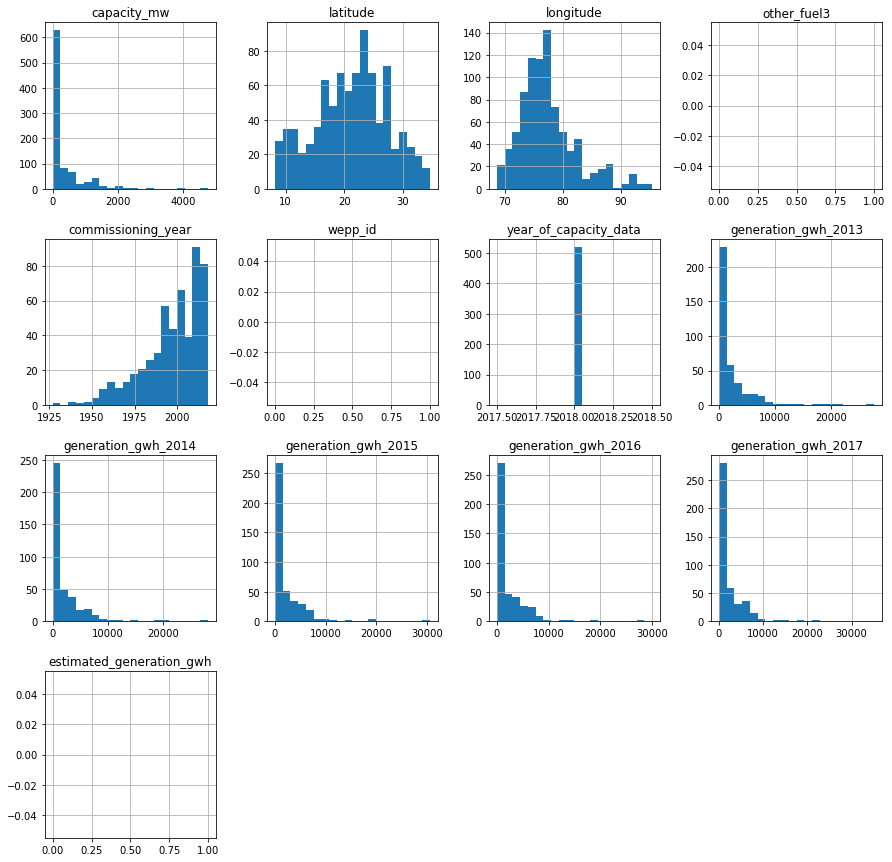

In [10]:
d.hist(bins = 20, figsize=(15,15))

From the above plot,we can see that columns "estimated_generation_gwh","wepp_id","other_fuel3" are having more missing values ,so we can drop these column .

Columns  "capacity_mw" , "generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017" has skewness in positive side and "commissioning_year" has skewness on left side i.e.. negative skewness.

We will treat this in outlier/skewness part.

We will also see each column of categorical data how the data has been distributed,

In [11]:
d['country'].value_counts()

IND    908
Name: country, dtype: int64

<AxesSubplot:>

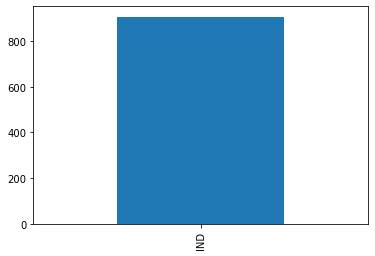

In [12]:
d['country'].value_counts().plot.bar()

In [13]:
d['country_long'].value_counts()

India    908
Name: country_long, dtype: int64

<AxesSubplot:>

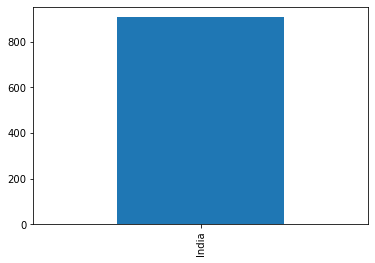

In [14]:
d['country_long'].value_counts().plot.bar()

We have only country India in our  Power plant database as per the counts from record and from the above bar plot.

In [15]:
d['name'].value_counts()

DHUVARAN CCPP                        1
Kamuthi Solar Power Plant            1
ANDHRA                               1
KUTCH LIG.                           1
MAQSOODPUR  IPP                      1
                                    ..
Sumilon Vershamedi Wind Farm         1
Gadna 1 Solar Power Plant            1
Dhank - Aravali Solar Power Plant    1
RAMGARH GT                           1
MUZAFFARPUR                          1
Name: name, Length: 908, dtype: int64

In [16]:
d['gppd_idnr'].value_counts()

WRI1026183    1
IND0000149    1
IND0000189    1
IND0000039    1
IND0000374    1
             ..
IND0000366    1
IND0000120    1
WRI1026066    1
WRI1026342    1
WRI1026774    1
Name: gppd_idnr, Length: 908, dtype: int64

From the above col NAME which is the name of the power plant name and it will be unique and we have 908 values,
and GPPD_IDNR which is identifier of the power plant and that also has unique values for each power plant.

In [17]:
d['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
31.2       1
105.7      1
63.2       1
49.6       1
2.5        1
Name: capacity_mw, Length: 365, dtype: int64

<AxesSubplot:ylabel='Frequency'>

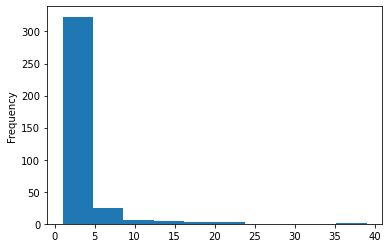

In [18]:
d['capacity_mw'].value_counts().plot.hist()

As per the above plot ,This col has outliers/skewness exist which is positively skewed and we have most of the power plant capacity is 5 megawatts and next is 10 MW and rest has different capacity

In [19]:
d['latitude'].value_counts()

24.1917    3
19.0004    3
10.3118    2
15.1839    2
14.2133    2
          ..
23.9784    1
24.5216    1
17.5010    1
20.9099    1
16.3125    1
Name: latitude, Length: 837, dtype: int64

<AxesSubplot:ylabel='Frequency'>

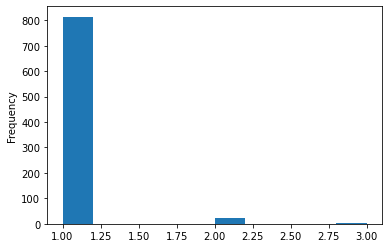

In [20]:
d['latitude'].value_counts().plot.hist()

In [21]:
d['longitude'].value_counts()

71.6917    4
75.8988    3
81.2875    3
71.6918    3
72.8983    3
          ..
79.0548    1
78.6463    1
88.4562    1
75.5302    1
87.2500    1
Name: longitude, Length: 828, dtype: int64

<AxesSubplot:ylabel='Frequency'>

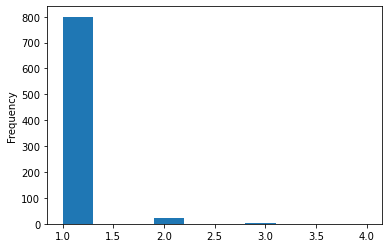

In [22]:
d['longitude'].value_counts().plot.hist()

This explains the latitude and longitude columns how the data has been distributed in the data base.
Longitude and Latitude explains the location of powerplant.

In [23]:
d['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

<AxesSubplot:>

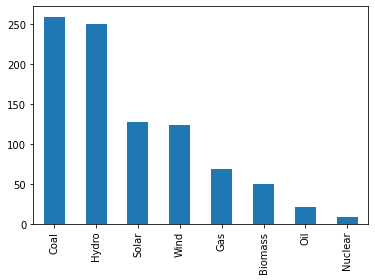

In [24]:
d['primary_fuel'].value_counts().plot.bar()

As per the above plot, We can see that most of the primary fuel in power plant is COAL and then next is HYDRO and least one is NUCLEAR.

In [25]:
d['commissioning_year'].value_counts()

2013.0    28
2015.0    26
2012.0    23
2016.0    21
2014.0    17
          ..
1939.0     1
1927.0     1
1949.0     1
1956.0     1
1969.0     1
Name: commissioning_year, Length: 73, dtype: int64

<AxesSubplot:>

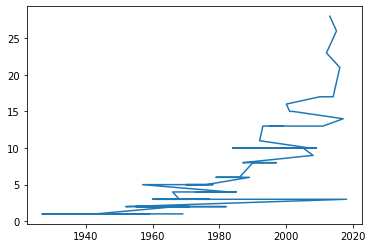

In [26]:
d['commissioning_year'].value_counts().plot.line()

The above plot explains the year of plant operation and we can see that plant has been operated more in between 2000-2020

In [27]:
d['year_of_capacity_data'].value_counts()

2018.0    520
Name: year_of_capacity_data, dtype: int64

<AxesSubplot:ylabel='Frequency'>

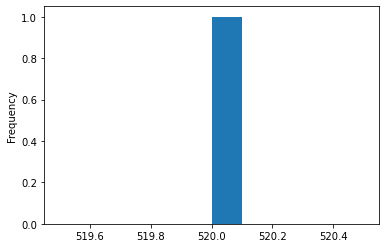

In [30]:
d['year_of_capacity_data'].value_counts().plot.hist()

From the above plot, We can see that year capacity information was reported was more on 2018 and only 2018 year and it has some missing values as well.

In [28]:
d['owner'].value_counts()

Jk Cement ltd                                        4
Acc Acc ltd                                          4
Sterling Agro Industries ltd.                        4
Hindustan Zinc ltd                                   3
Tata Power Solar Systems Limited (TPREL)             3
                                                    ..
National Thermal Power Corporation (NTPC) Limited    1
Rajasthan State Mines and Minerals Limited           1
Davangere Co ltd                                     1
Raajratna Energy Holdings Private Limited (REHPL)    1
Sunflag Co ltd                                       1
Name: owner, Length: 280, dtype: int64

In [29]:
d['source'].value_counts()

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
Grasim Industries ltd                          1
Greta Energy ltd                               1
Powers Private                                 1
Nitin Spinners ltd                             1
Vishwanath Sugars ltd                          1
Name: source, Length: 191, dtype: int64

In [31]:
d['url'].value_counts()

http://www.cea.nic.in/                                                                                                                        520
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                                                                                 7
http://www.ntpc.co.in                                                                                                                           6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf                                                                5
http://www.peda.gov.in/main/SPVPowerProjects.html                                                                                               4
                                                                                                                                             ... 
https://cdm.unfccc.int/Projects/DB/RWTUV1411994965.49/view                                                                  

From the above plot, We can see the column owner will have different values and column source which is nothing but the organization of power plant and Central Electricity Authority has more power plant

In [32]:
d['geolocation_source'].value_counts()

WRI                                     766
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

<AxesSubplot:>

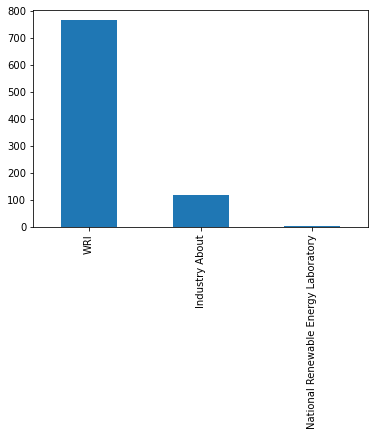

In [33]:
d['geolocation_source'].value_counts().plot.bar()

From the above plot, most of the power plant geo-location source is WRI

In [34]:
d['generation_data_source'].value_counts()

Central Electricity Authority    450
Name: generation_data_source, dtype: int64

<AxesSubplot:>

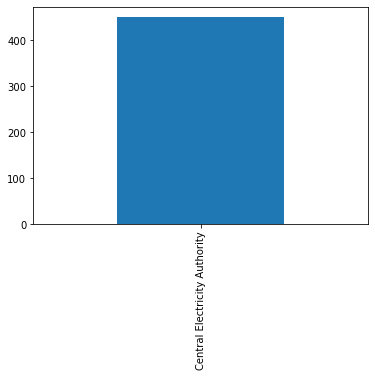

In [35]:
d['generation_data_source'].value_counts().plot.bar()

Above plot tells that generation data source has only one value and it is Central Electricity Authority and it has some missing values.

As we have numerical and categorical values in dataset, our model will not understand categoical values.So here I am converting the categorical values into numerical values through encoding techniques and we have missing values in dataset.

So we need to treat missing values first.

Here I am splitting numerical and categorical data,

In [36]:
num = d.select_dtypes(exclude = object)
cat = d.select_dtypes(include = object)

In [37]:
num.isnull().sum()

capacity_mw                   0
latitude                     46
longitude                    46
other_fuel3                 908
commissioning_year          380
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
estimated_generation_gwh    908
dtype: int64

We can see that most of the columns has missing values and columns --> "other_fuel3","wepp_id","estimated_generation_gwh" has no values at all..SO we can drop these columns

In [38]:
num = num.drop(columns = ['other_fuel3','wepp_id','estimated_generation_gwh'],axis = 1)
num

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,2011.0,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2004.0,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,2015.0,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,2016.0,2018.0,NaN,NaN,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,25.5,15.2758,75.5811,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,80.0,24.3500,73.7477,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filling the null values with mean() and mode() values,

In [39]:
num['latitude'] = num['latitude'].fillna(num['latitude'].mode()[0])
num['longitude'] = num['longitude'].fillna(num['longitude'].mode()[0])
num['commissioning_year'] = num['commissioning_year'].fillna(num['commissioning_year'].mode()[0])
num['year_of_capacity_data'] = num['year_of_capacity_data'].fillna(num['year_of_capacity_data'].mode()[0])
num['generation_gwh_2013'] = num['generation_gwh_2013'].fillna(num['generation_gwh_2013'].mean())
num['generation_gwh_2014'] = num['generation_gwh_2014'].fillna(num['generation_gwh_2014'].mean())
num['generation_gwh_2015'] = num['generation_gwh_2015'].fillna(num['generation_gwh_2015'].mean())
num['generation_gwh_2016'] = num['generation_gwh_2016'].fillna(num['generation_gwh_2016'].mean())
num['generation_gwh_2017'] = num['generation_gwh_2017'].fillna(num['generation_gwh_2017'].mean())

In [40]:
#Checking null values after treated and data looks cleaned

num.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
commissioning_year       0
year_of_capacity_data    0
generation_gwh_2013      0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
dtype: int64

In [41]:
cat.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
primary_fuel                0
other_fuel1               709
other_fuel2               907
owner                     566
source                      0
url                         0
geolocation_source         19
generation_data_source    458
dtype: int64

Col --> other_fuel1,other_fuel2 has more null values .so,I am dropping this 2 columns.

Other than this, col --> country and county_long has same value and hence dropping country column.

Col --> name,owner,url has more unique values and it may affect our model performance and on dropping this,it will not have any much effect on database.hence dropping this columns as well.

In [42]:
cat = cat.drop(columns = ['other_fuel1','other_fuel2','country','name','owner','url'],axis = 1)
cat

,country_long,gppd_idnr,primary_fuel,source,geolocation_source,generation_data_source
0,India,WRI1020239,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN
1,India,WRI1019881,Coal,Ultratech Cement ltd,WRI,NaN
2,India,WRI1026669,Wind,CDM,WRI,NaN
3,India,IND0000001,Gas,Central Electricity Authority,WRI,Central Electricity Authority
4,India,IND0000002,Coal,Central Electricity Authority,WRI,Central Electricity Authority
...,...,...,...,...,...,...
903,India,IND0000513,Coal,Central Electricity Authority,WRI,Central Electricity Authority
904,India,WRI1026222,Solar,Karnataka Power Corporation Limited,Industry About,NaN
905,India,WRI1026776,Wind,CDM,WRI,NaN
906,India,WRI1019901,Coal,Hindustan Zinc ltd,WRI,NaN


Filling the missing values for the below col with mode values,

In [43]:
cat['geolocation_source'] = cat['geolocation_source'].fillna(cat['geolocation_source'].mode()[0])
cat['generation_data_source'] = cat['generation_data_source'].fillna(cat['generation_data_source'].mode()[0])

As the categorical dataset,we should convert categorical data into numerical data and I am using labelEncoder method to decode as most of the values are in ordinal way.

In [44]:
le = LabelEncoder()
cat = cat.apply(le.fit_transform)

In [45]:
cat.head()

,country_long,gppd_idnr,primary_fuel,source,geolocation_source,generation_data_source
0,0,658,6,109,1,0
1,0,520,1,174,2,0
2,0,854,7,21,2,0
3,0,0,2,22,2,0
4,0,1,1,22,2,0


In [46]:
num.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.0,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.084948,77.156237,2003.624449,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.107146,4.945215,15.238021,0.0,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,73.812975,1997.000000,2018.0,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,60.000000,21.278850,76.492900,2013.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,388.125000,25.183775,79.211600,2013.000000,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


We can see outliers present in capacity_mw column and genration_gwh_2013 to 2017 

We will see the data distribution using dist plot,

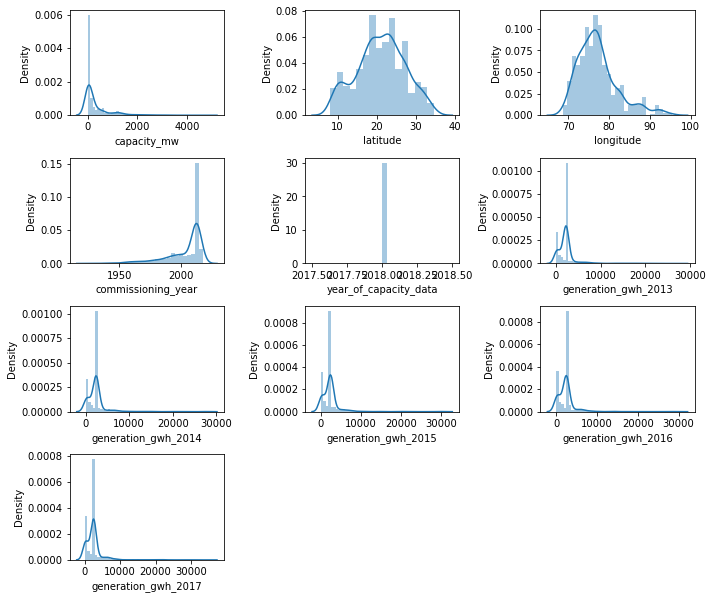

In [47]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in num:
    if pltnumber<=10:
        ax = plt.subplot(5,3,pltnumber)
        sns.distplot(num[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

As we discussed earlier, most of the columns has outliers except "year_of_capacity_data" as it has only one value.
So we will check each and every column using boxplot.

Tried applying Z - Score method,and data loss is more than 10%.So going for simple quantile method as we have limited columns.

<AxesSubplot:xlabel='capacity_mw'>

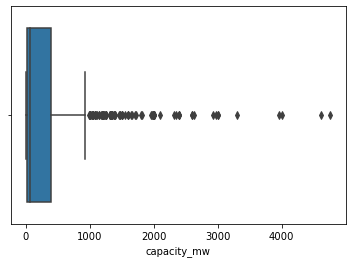

In [48]:
sns.boxplot(num['capacity_mw'])

<AxesSubplot:xlabel='capacity_mw'>

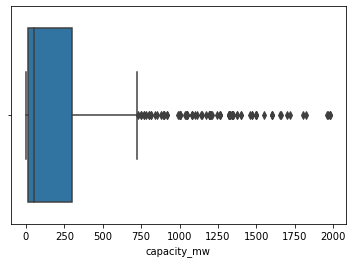

In [49]:
quant = num['capacity_mw'].quantile(0.98)
new = num['capacity_mw'][num['capacity_mw']<quant]
sns.boxplot(new)

<AxesSubplot:xlabel='commissioning_year'>

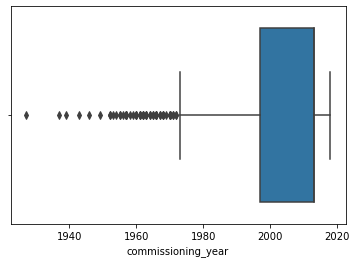

In [50]:
sns.boxplot(num['commissioning_year'])

<AxesSubplot:xlabel='commissioning_year'>

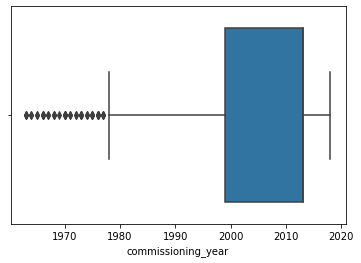

In [51]:
quant = num['commissioning_year'].quantile(0.03)
new = num['commissioning_year'][num['commissioning_year']>quant]
sns.boxplot(new)

<AxesSubplot:xlabel='longitude'>

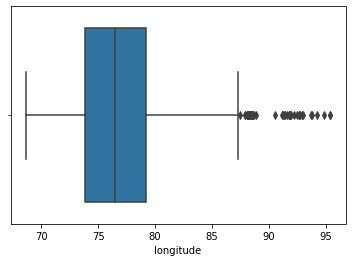

In [52]:
sns.boxplot(num['longitude'])

<AxesSubplot:xlabel='longitude'>

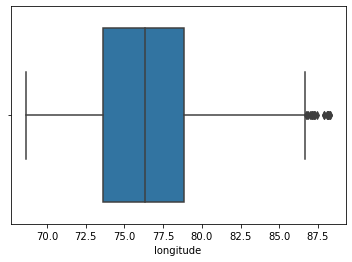

In [53]:
quant = num['longitude'].quantile(0.96)
new = num['longitude'][num['longitude']<quant]
sns.boxplot(new)

<AxesSubplot:xlabel='year_of_capacity_data'>

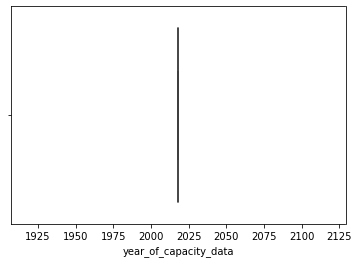

In [54]:
sns.boxplot(num['year_of_capacity_data'])

<AxesSubplot:xlabel='generation_gwh_2013'>

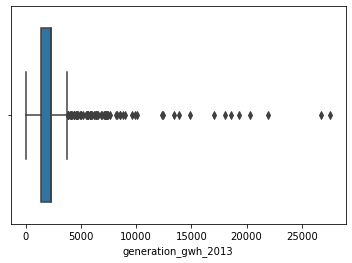

In [55]:
sns.boxplot(num['generation_gwh_2013'])

<AxesSubplot:xlabel='generation_gwh_2013'>

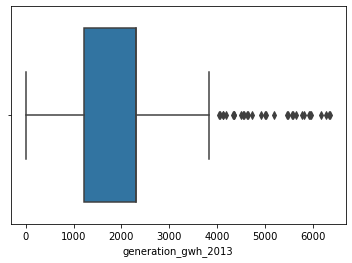

In [56]:
quant = num['generation_gwh_2013'].quantile(0.96)
new = num['generation_gwh_2013'][num['generation_gwh_2013']<quant]
sns.boxplot(new)

<AxesSubplot:xlabel='generation_gwh_2014'>

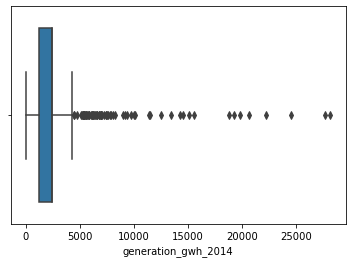

In [57]:
sns.boxplot(num['generation_gwh_2014'])

<AxesSubplot:xlabel='generation_gwh_2014'>

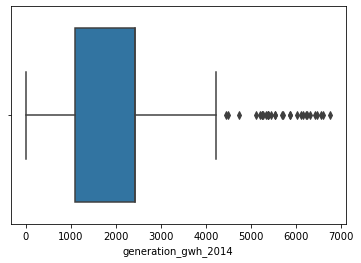

In [58]:
quant = num['generation_gwh_2014'].quantile(0.96)
new = num['generation_gwh_2014'][num['generation_gwh_2014']<quant]
sns.boxplot(new)

<AxesSubplot:xlabel='generation_gwh_2015'>

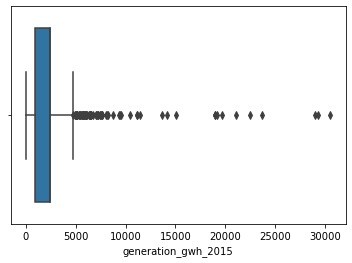

In [59]:
sns.boxplot(num['generation_gwh_2015'])

<AxesSubplot:xlabel='generation_gwh_2015'>

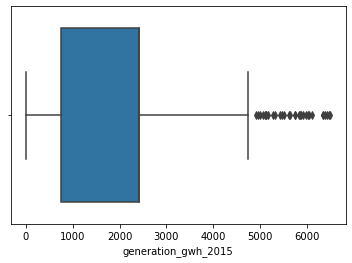

In [60]:
quant = num['generation_gwh_2015'].quantile(0.96)
new = num['generation_gwh_2015'][num['generation_gwh_2015']<quant]
sns.boxplot(new)

<AxesSubplot:xlabel='generation_gwh_2016'>

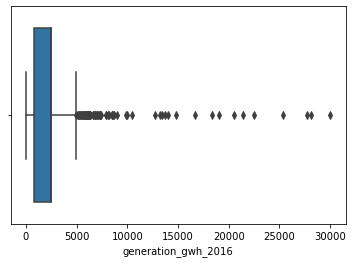

In [61]:
sns.boxplot(num['generation_gwh_2016'])

<AxesSubplot:xlabel='generation_gwh_2016'>

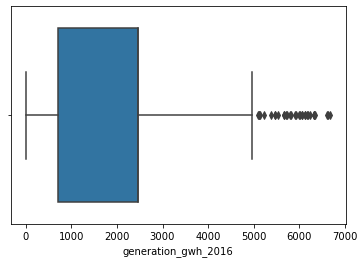

In [62]:
quant = num['generation_gwh_2016'].quantile(0.96)
new = num['generation_gwh_2016'][num['generation_gwh_2016']<quant]
sns.boxplot(new)

<AxesSubplot:xlabel='generation_gwh_2017'>

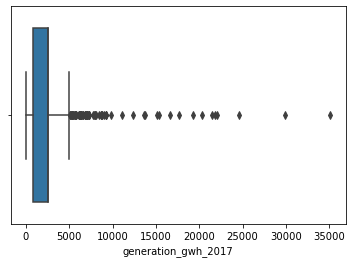

In [63]:
sns.boxplot(num['generation_gwh_2017'])

<AxesSubplot:xlabel='generation_gwh_2017'>

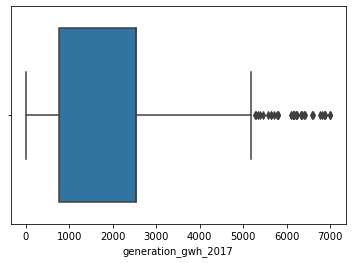

In [64]:
quant = num['generation_gwh_2017'].quantile(0.96)
new = num['generation_gwh_2017'][num['generation_gwh_2017']<quant]
sns.boxplot(new)

We should not allowed for data loss >10%.
So tried removing most of the outliers through quantile method and then we can check skewness and will remove that skewness from the given data.

NOTE: We can apply outliers / skewness to numerical data only.

In [65]:
quant1 = num['capacity_mw'].quantile(0.98)
quant2 = num['commissioning_year'].quantile(0.02)
quant3 = num['longitude'].quantile(0.98)
quant4 = num['generation_gwh_2013'].quantile(0.98)
quant5 = num['generation_gwh_2014'].quantile(0.98)
quant6 = num['generation_gwh_2015'].quantile(0.98)
quant7 = num['generation_gwh_2016'].quantile(0.98)
quant8 = num['generation_gwh_2017'].quantile(0.98)


In [66]:
print(num.shape)
num = num[num['capacity_mw'] <quant1]
print(num.shape)
num = num[num['commissioning_year'] >quant2]
print(num.shape)
num = num[num['longitude'] <quant3]
print(num.shape)
num = num[num['generation_gwh_2013'] <quant4]
print(num.shape)
num = num[num['generation_gwh_2014'] <quant5]
print(num.shape)
num = num[num['generation_gwh_2015'] <quant6]
print(num.shape)
num = num[num['generation_gwh_2016'] <quant7]
print(num.shape)
num = num[num['generation_gwh_2017'] <quant8]
print(num.shape)

(908, 10)
(886, 10)
(867, 10)
(849, 10)
(844, 10)
(844, 10)
(844, 10)
(844, 10)
(843, 10)


We are losing ~ 7% of data and it's applicable and we will go ahead and check the skewness and if any skewness more than +-0.5,we will remove it 

In [67]:
num.skew()

capacity_mw              1.994157
latitude                -0.050563
longitude                0.888918
commissioning_year      -1.611390
year_of_capacity_data    0.000000
generation_gwh_2013      1.351952
generation_gwh_2014      1.225627
generation_gwh_2015      1.150145
generation_gwh_2016      1.158883
generation_gwh_2017      1.138932
dtype: float64

We can see that most of the columns has skewed and so am applying power_transform method 

In [68]:
from sklearn.preprocessing import power_transform
df = power_transform(num, method ='yeo-johnson')

df= pd.DataFrame(df,columns=num.columns)

In [69]:
df.skew()

capacity_mw              0.012942
latitude                -0.063538
longitude                0.031452
commissioning_year      -1.177378
year_of_capacity_data    0.000000
generation_gwh_2013     -0.207561
generation_gwh_2014     -0.288541
generation_gwh_2015     -0.355419
generation_gwh_2016     -0.355232
generation_gwh_2017     -0.372972
dtype: float64

Skewness has been removed and dropping column "year_of_capacity_data" as it is having 0.

In [70]:
df = df.drop(columns = ['year_of_capacity_data'],axis = 1)
df

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,-1.674242,1.169363,-0.797077,0.432468,0.319630,0.342149,0.372036,0.377610,0.374820
1,0.235380,0.612672,-0.387900,0.647304,0.319630,0.342149,0.372036,0.377610,0.374820
2,-0.265779,0.145229,-2.222358,0.647304,0.319630,0.342149,0.372036,0.377610,0.374820
3,0.409595,0.466625,2.379624,-0.246680,-1.078864,-1.067254,-0.731730,-0.683771,-0.903714
4,1.782612,0.154467,1.294140,0.872162,-0.136575,0.704945,1.980088,2.025314,1.621557
...,...,...,...,...,...,...,...,...,...
838,1.721735,-0.774385,0.316140,0.988491,0.319630,0.342149,-2.081480,-1.424564,-0.717753
839,-1.595224,-1.335039,0.497442,0.647304,0.319630,0.342149,0.372036,0.377610,0.374820
840,-0.500890,-0.942086,-0.122099,0.647304,0.319630,0.342149,0.372036,0.377610,0.374820
841,0.124653,0.544761,-0.640419,0.647304,0.319630,0.342149,0.372036,0.377610,0.374820


Merging the numerical and categorical data into single DataFrame,

In [71]:
df1 = pd.concat([df,cat],axis = 1)
df1

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,country_long,gppd_idnr,primary_fuel,source,geolocation_source,generation_data_source
0,-1.674242,1.169363,-0.797077,0.432468,0.319630,0.342149,0.372036,0.377610,0.374820,0,658,6,109,1,0
1,0.235380,0.612672,-0.387900,0.647304,0.319630,0.342149,0.372036,0.377610,0.374820,0,520,1,174,2,0
2,-0.265779,0.145229,-2.222358,0.647304,0.319630,0.342149,0.372036,0.377610,0.374820,0,854,7,21,2,0
3,0.409595,0.466625,2.379624,-0.246680,-1.078864,-1.067254,-0.731730,-0.683771,-0.903714,0,0,2,22,2,0
4,1.782612,0.154467,1.294140,0.872162,-0.136575,0.704945,1.980088,2.025314,1.621557,0,1,1,22,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,494,1,22,2,0
904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,823,6,77,0,0
905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,892,7,21,2,0
906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,540,1,59,2,0


In [72]:
df1 = df1.dropna()
df1 = df1.reset_index(drop= True)

In [73]:
df1.head(10)

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,country_long,gppd_idnr,primary_fuel,source,geolocation_source,generation_data_source
0,-1.674242,1.169363,-0.797077,0.432468,0.319630,0.342149,0.372036,0.377610,0.374820,0,658,6,109,1,0
1,0.235380,0.612672,-0.387900,0.647304,0.319630,0.342149,0.372036,0.377610,0.374820,0,520,1,174,2,0
2,-0.265779,0.145229,-2.222358,0.647304,0.319630,0.342149,0.372036,0.377610,0.374820,0,854,7,21,2,0
3,0.409595,0.466625,2.379624,-0.246680,-1.078864,-1.067254,-0.731730,-0.683771,-0.903714,0,0,2,22,2,0
4,1.782612,0.154467,1.294140,0.872162,-0.136575,0.704945,1.980088,2.025314,1.621557,0,1,1,22,2,0
5,0.742380,0.449927,-2.544276,-0.156186,-0.875221,-0.559112,-0.423871,-0.445063,-0.488247,0,2,1,22,2,0
6,-0.032657,-1.738667,0.234504,-2.356156,-1.772076,-1.701493,-1.587114,-1.783924,-1.702909,0,3,3,22,2,0
7,0.600235,1.826014,0.281356,0.328671,-1.006797,-1.006600,-0.847887,-0.880462,-0.888253,0,4,3,22,2,0
8,0.822012,-0.768613,-0.042590,-0.246680,-1.228918,-1.224738,-1.602537,-1.185454,-1.145067,0,5,3,22,2,0
9,0.648564,0.351192,1.166396,0.128055,0.541533,-0.004359,-0.107985,-0.323156,-0.193961,0,6,1,22,2,0


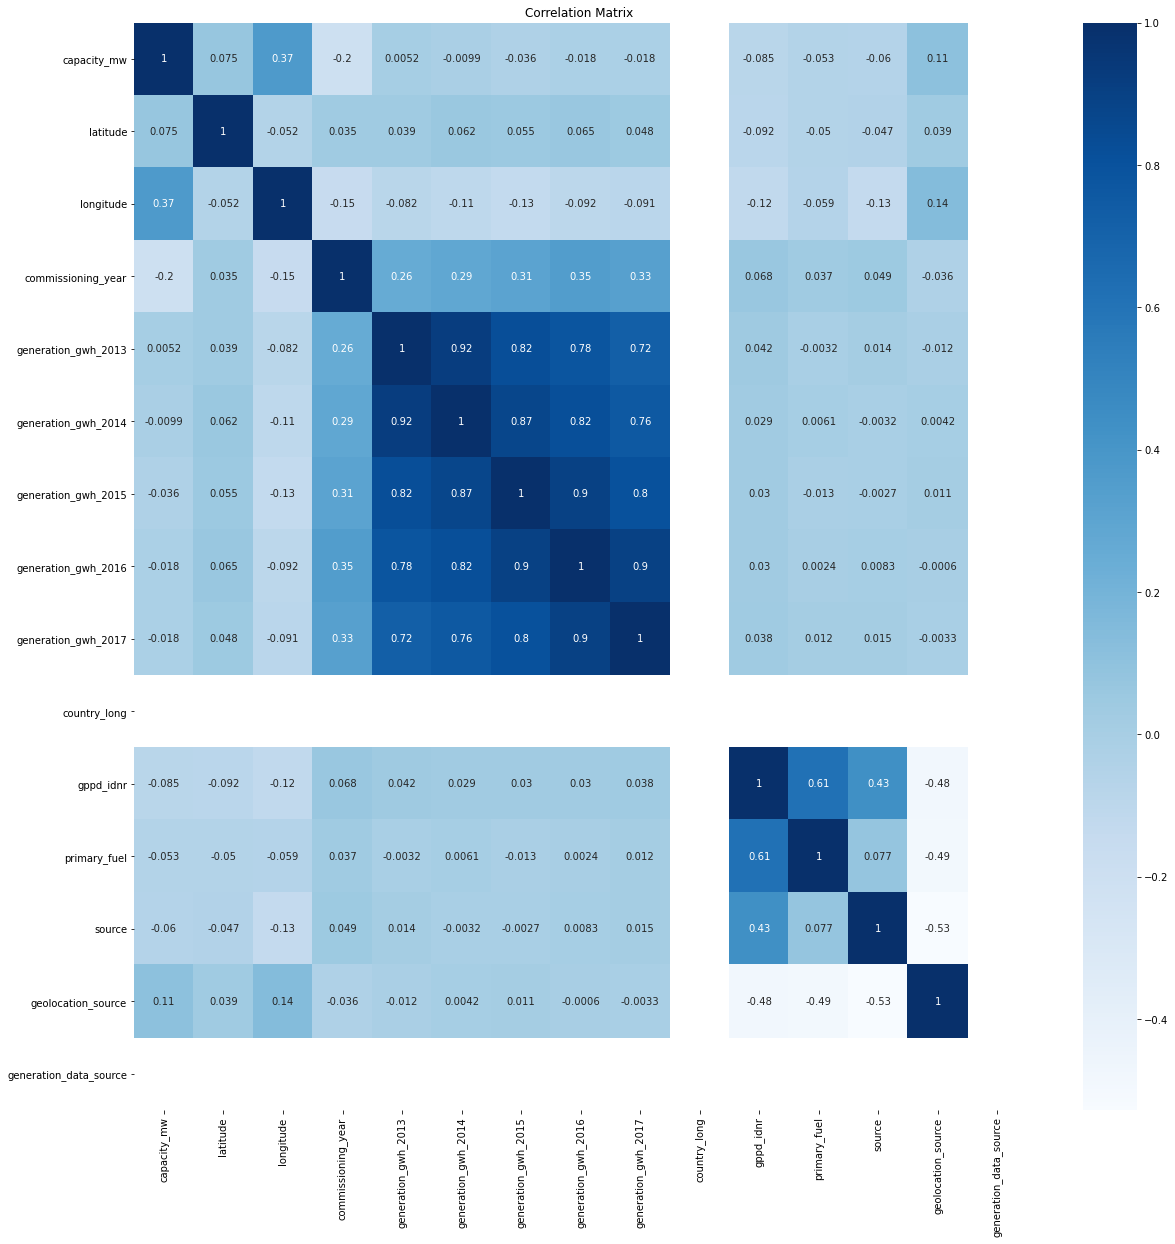

In [74]:
#Correlation Matrix

corr = df1.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr,cmap = 'Blues', annot = True)
plt.title("Correlation Matrix ")
plt.show()

Dropping the country_long and generation_data_source columns as it has only one value as per correlation matrix,

In [75]:
df1 = df1.drop(columns = ['country_long','generation_data_source'],axis = 1)
df1

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,gppd_idnr,primary_fuel,source,geolocation_source
0,-1.674242,1.169363,-0.797077,0.432468,0.319630,0.342149,0.372036,0.377610,0.374820,658,6,109,1
1,0.235380,0.612672,-0.387900,0.647304,0.319630,0.342149,0.372036,0.377610,0.374820,520,1,174,2
2,-0.265779,0.145229,-2.222358,0.647304,0.319630,0.342149,0.372036,0.377610,0.374820,854,7,21,2
3,0.409595,0.466625,2.379624,-0.246680,-1.078864,-1.067254,-0.731730,-0.683771,-0.903714,0,2,22,2
4,1.782612,0.154467,1.294140,0.872162,-0.136575,0.704945,1.980088,2.025314,1.621557,1,1,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,1.721735,-0.774385,0.316140,0.988491,0.319630,0.342149,-2.081480,-1.424564,-0.717753,698,7,21,2
839,-1.595224,-1.335039,0.497442,0.647304,0.319630,0.342149,0.372036,0.377610,0.374820,881,7,21,2
840,-0.500890,-0.942086,-0.122099,0.647304,0.319630,0.342149,0.372036,0.377610,0.374820,452,3,22,2
841,0.124653,0.544761,-0.640419,0.647304,0.319630,0.342149,0.372036,0.377610,0.374820,453,3,22,2


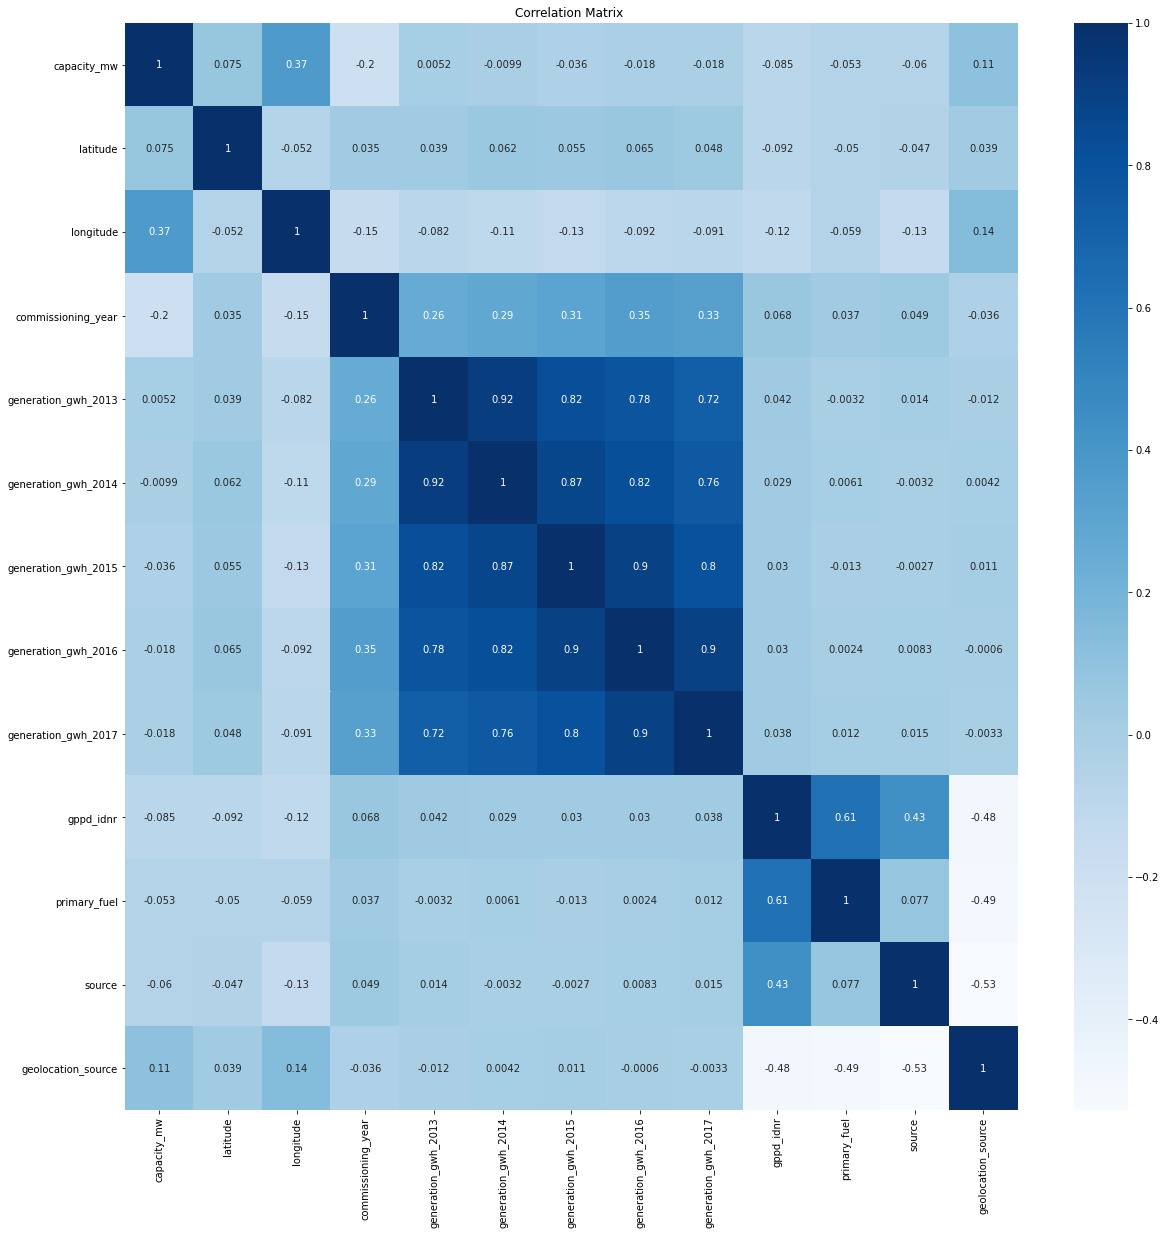

In [76]:
corr = df1.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr,cmap = 'Blues', annot = True)
plt.title("Correlation Matrix ")
plt.show()

After  merging both numerical and categorical into single value,Splitting x and y values,

In [77]:
X = df1.drop(columns = ['primary_fuel'],axis = 1)
y = df1['primary_fuel']

In [78]:
y.value_counts()

1    239
3    231
6    123
7    113
2     60
0     48
5     20
4      9
Name: primary_fuel, dtype: int64

Checking the target variable "primary_fuel" and let's see whether classes are balanced or not and we can see that it is a multi-class classification ,

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

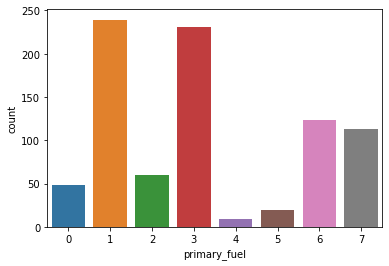

In [79]:
sns.countplot(df1['primary_fuel'])

We can see that classes are imbalanced and I am using SMOTE() technique to balance the imbalanced dataset,

In [80]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

sm = SMOTE()
x_over,y_over = sm.fit_resample(X,y)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

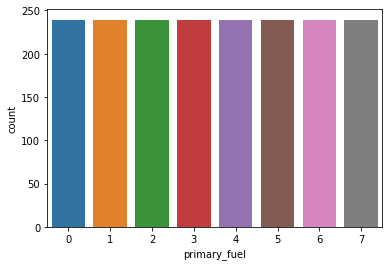

In [81]:
#Now the classes are balanced.

sns.countplot(y_over)

Scaling the data using StandardScaler() in order to equalize the range of values in dataset,

In [189]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(x_over)

Train - Test Split

In [190]:
x_train,x_test,y_train,y_test = train_test_split(x_sc,y_over, test_size = 0.20, random_state = 101)

Importing scikitplot for multi class target variable matrix

In [84]:
import scikitplot as skplt

We have splitted the training data and testing data and then now we need to proceed for building the model for various algorithms.

Here I am using the below algorithms to build the model and chose a best model by comparing the score with cross validation score and f1 score and the classed are imbalannced in nature,So F1 score metrics is better here to calculate the accuracy.

1) Decision Tree Classifier
2) Random Forest Classifier
3) K Neighbors Classifier
4) Gradient Boost Classifier

Model 1 : DECISION TREE CLASSIFIER

Applying CV Score and we will see the f1 score accuracy and cv score to chose the best model,

F1 score 
 0.7505739626216268
CV Score of DT : 0.6998086202889834
Accuracy score 
 0.7545691906005222
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.98      0.90        48
           1       0.56      0.40      0.47        50
           2       0.55      0.55      0.55        49
           3       0.47      0.43      0.45        51
           4       0.83      0.87      0.85        52
           5       0.73      0.87      0.80        38
           6       1.00      1.00      1.00        49
           7       1.00      1.00      1.00        46

    accuracy                           0.75       383
   macro avg       0.75      0.76      0.75       383
weighted avg       0.74      0.75      0.75       383

--------------------------------------------------------

Confusion Matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)


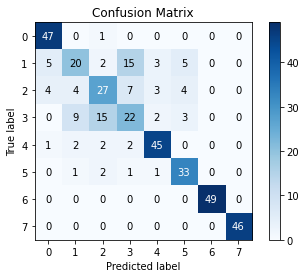

In [86]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
scr_dt = cross_val_score(dt,x_over,y_over,cv=5)


print("F1 score \n", f1_score(y_test,y_pred, average='macro'))
print("CV Score of DT :", scr_dt.mean())
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", skplt.metrics.plot_confusion_matrix(y_test,y_pred))

ROC CURVE for Decision Tree:

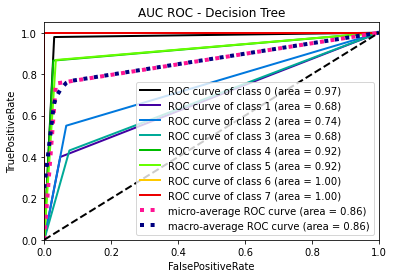

In [87]:
probas1 = dt.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas1)


plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('AUC ROC - Decision Tree')
plt.show()

Model 2: RANDOM FOREST CLASSIFIER

F1 score 
 0.797677757536206
CV Score of RFC : 0.7803685426435006
Accuracy score 
 0.7989556135770235
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90        48
           1       0.59      0.44      0.51        50
           2       0.66      0.63      0.65        49
           3       0.55      0.55      0.55        51
           4       0.86      0.92      0.89        52
           5       0.89      0.89      0.89        38
           6       1.00      1.00      1.00        49
           7       1.00      1.00      1.00        46

    accuracy                           0.80       383
   macro avg       0.80      0.80      0.80       383
weighted avg       0.79      0.80      0.79       383

--------------------------------------------------------

Confusion Matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)


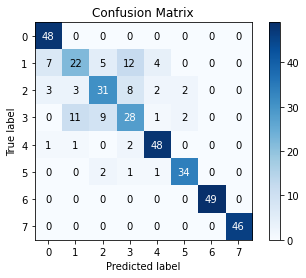

In [88]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
scr_rfc = cross_val_score(rfc,x_over,y_over,cv=5)


print("F1 score \n", f1_score(y_test,y_pred, average='macro'))
print("CV Score of RFC :", scr_rfc.mean())
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", skplt.metrics.plot_confusion_matrix(y_test,y_pred))

ROC CURVE for Random Forest:

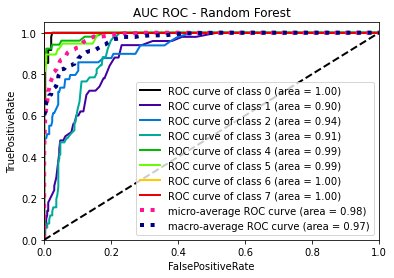

In [89]:
probas2 = rfc.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas2)


plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('AUC ROC - Random Forest')
plt.show()

Model 3: K NEIGHBORS CLASSIFIER

F1 score 
 0.7074584285312009
CV Score of DT : 0.5904884283624732
Accuracy score 
 0.7232375979112271
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.78      0.94      0.85        48
           1       0.35      0.26      0.30        50
           2       0.59      0.65      0.62        49
           3       0.40      0.24      0.30        51
           4       0.79      0.96      0.87        52
           5       0.74      0.92      0.82        38
           6       0.98      1.00      0.99        49
           7       0.93      0.89      0.91        46

    accuracy                           0.72       383
   macro avg       0.70      0.73      0.71       383
weighted avg       0.69      0.72      0.70       383

--------------------------------------------------------

Confusion Matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)


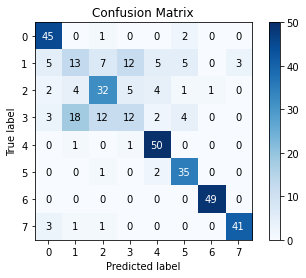

In [90]:
from sklearn.neighbors import KNeighborsClassifier


knc = KNeighborsClassifier(n_neighbors = 3)
knc.fit(x_train,y_train)
y_pred = knc.predict(x_test)
scr_knc = cross_val_score(knc,x_over,y_over,cv=5)


print("F1 score \n", f1_score(y_test,y_pred, average='macro'))
print("CV Score of DT :", scr_knc.mean())
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", skplt.metrics.plot_confusion_matrix(y_test,y_pred))

ROC CURVE for K Neighbors:

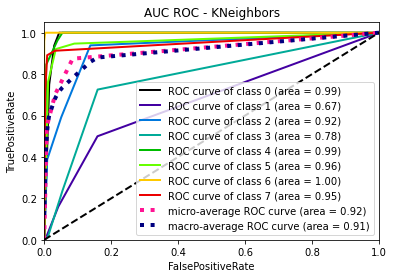

In [91]:
probas4 = knc.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas4)


plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('AUC ROC - KNeighbors')
plt.show()

F1 score 
 0.788897194700109
CV Score of DT : 0.7097521632742334
Accuracy score 
 0.7911227154046997
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        48
           1       0.58      0.42      0.49        50
           2       0.70      0.63      0.67        49
           3       0.53      0.61      0.56        51
           4       0.88      0.88      0.88        52
           5       0.76      0.82      0.78        38
           6       1.00      1.00      1.00        49
           7       1.00      1.00      1.00        46

    accuracy                           0.79       383
   macro avg       0.79      0.80      0.79       383
weighted avg       0.79      0.79      0.79       383

--------------------------------------------------------

Confusion Matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)


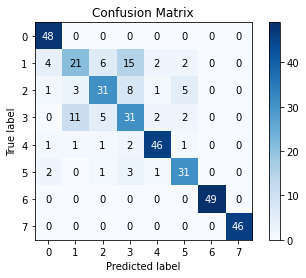

In [92]:
from sklearn.ensemble import GradientBoostingClassifier


gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred = gbc.predict(x_test)
scr_gbc = cross_val_score(gbc,x_over,y_over,cv=5)


print("F1 score \n", f1_score(y_test,y_pred, average='macro'))
print("CV Score of DT :", scr_gbc.mean())
print("Accuracy score \n", accuracy_score(y_test,y_pred))
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,y_pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", skplt.metrics.plot_confusion_matrix(y_test,y_pred))

ROC CURVE for Gradient Boost:

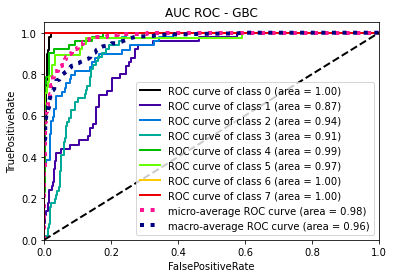

In [93]:
probas5 = gbc.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas5)


plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('AUC ROC - GBC')
plt.show()

As per the CV Score and F1 score accuracy, less difference of model is choosen as best model.
So as per that , RANDOM FOREST is the best model.

We will try to improve the accuracy of the model through Hyper-parameter tuning.

Hyper parameter Tuning :

In [94]:
param = {'n_estimators' : [40,60,80,100] ,'max_depth': [4,8,12,16,20],'criterion' : ['gini','entropy'],
             'min_samples_leaf' : [2,4,6,8,10], 'min_samples_split' : [3,6,9,12,15] }

In [95]:
gs = GridSearchCV(rfc, param_grid = param, cv= 5)

In [96]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 12, 16, 20],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [3, 6, 9, 12, 15],
                         'n_estimators': [40, 60, 80, 100]})

In [99]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 80}

F1 score 
 0.7961901910638413
Accuracy score 
 0.7989556135770235
-------------------------------------------------------

Classification Report 
               precision    recall  f1-score   support

           0       0.79      1.00      0.88        48
           1       0.60      0.36      0.45        50
           2       0.73      0.61      0.67        49
           3       0.52      0.63      0.57        51
           4       0.86      0.94      0.90        52
           5       0.92      0.89      0.91        38
           6       1.00      1.00      1.00        49
           7       1.00      1.00      1.00        46

    accuracy                           0.80       383
   macro avg       0.80      0.80      0.80       383
weighted avg       0.80      0.80      0.79       383

--------------------------------------------------------

Confusion Matrix 
 AxesSubplot(0.125,0.125;0.62x0.755)


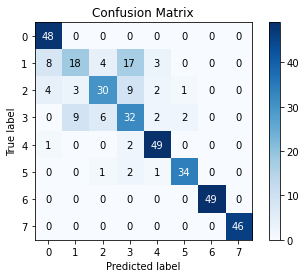

In [202]:
final = RandomForestClassifier(n_estimators=100 , criterion = 'entropy', max_depth = 18, 
                               min_samples_leaf =2,min_samples_split =3)

final.fit(x_train,y_train)
pred = final.predict(x_test)

print("F1 score \n", f1_score(y_test,pred, average='macro'))
print("Accuracy score \n", accuracy_score(y_test,pred))
print("-------------------------------------------------------\n")
print("Classification Report \n", classification_report(y_test,pred))
print("--------------------------------------------------------\n")
print("Confusion Matrix \n", skplt.metrics.plot_confusion_matrix(y_test,pred))

After Hyper parameter Tuning using different parameter, our model has achieved the accuracy score of 81%.

ROC Curve for final Model:

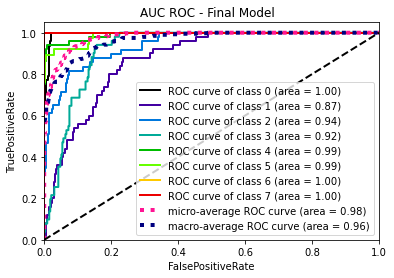

In [203]:
probas6 = final.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas6)


plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('AUC ROC - Final Model  ')
plt.show()

Saving the Model

In [204]:
test = pd.DataFrame({'Actual':y_test,'Predicted':pred})
test

,Actual,Predicted
489,3,3
1689,6,6
762,6,6
735,3,2
330,3,2
...,...,...
1208,2,0
1398,4,4
1315,4,4
1269,4,4


In [205]:
import joblib
joblib.dump(final,"Power_Plant_classifi.pkl")

['Power_Plant_classifi.pkl']

# ********************************  CLASSIFCATION PROBLEM ENDS ***********************************************

As we have two target variable, Let me check with target variable - capacity_mw and see the accuracy score and this is Regression Model,

In [119]:
df1.head(20)

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,gppd_idnr,primary_fuel,source,geolocation_source
0,-1.674242,1.169363,-0.797077,0.432468,0.319630,0.342149,0.372036,0.377610,0.374820,658,6,109,1
1,0.235380,0.612672,-0.387900,0.647304,0.319630,0.342149,0.372036,0.377610,0.374820,520,1,174,2
2,-0.265779,0.145229,-2.222358,0.647304,0.319630,0.342149,0.372036,0.377610,0.374820,854,7,21,2
3,0.409595,0.466625,2.379624,-0.246680,-1.078864,-1.067254,-0.731730,-0.683771,-0.903714,0,2,22,2
4,1.782612,0.154467,1.294140,0.872162,-0.136575,0.704945,1.980088,2.025314,1.621557,1,1,22,2
5,0.742380,0.449927,-2.544276,-0.156186,-0.875221,-0.559112,-0.423871,-0.445063,-0.488247,2,1,22,2
6,-0.032657,-1.738667,0.234504,-2.356156,-1.772076,-1.701493,-1.587114,-1.783924,-1.702909,3,3,22,2
7,0.600235,1.826014,0.281356,0.328671,-1.006797,-1.006600,-0.847887,-0.880462,-0.888253,4,3,22,2
8,0.822012,-0.768613,-0.042590,-0.246680,-1.228918,-1.224738,-1.602537,-1.185454,-1.145067,5,3,22,2
9,0.648564,0.351192,1.166396,0.128055,0.541533,-0.004359,-0.107985,-0.323156,-0.193961,6,1,22,2


In [ ]:
df1 = df1.sample(frac = 1)

Splitting x and y variable for building the model

In [120]:
x = df1.drop(columns = ['capacity_mw'],axis = 1)
y = df1['capacity_mw']

Scaling the variable X in order to equalize the range of values,

In [121]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(x)

Train test Split

In [156]:
x_train,x_test,y_train,y_test = train_test_split(x_sc,y, test_size = 0.25, random_state = 111)

In [157]:
from sklearn import metrics
from sklearn.metrics import r2_score

I am building model using different algorithms and will compare the accuracy and cross val score and depends on score we will chose the best model.

1) Support Vector Regressor
2) Random Forest Regressor
3) Decision Tree Regressor
4) Ada Boost Regressor
5) Gradient Boost Regressor

Model 1: SUPPORT VECTOR REGRESSOR:

Applying cross val score and r2 score metrics for accuracy score and comparing the difference and will choose the best model based on less difference.

In [158]:
from sklearn.svm import SVR

svm = SVR()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
scr_svm = cross_val_score(svm,x_sc,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_svm.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", svm.score(x_train,y_train))
print("Test Score", svm.score(x_test,y_test))

r2_Score 0.5046064107880668
CV Score 0.5235789472549173
MSE 0.49713009057036045
RMSE 0.7050745283800575
Train Score 0.6605969118539354
Test Score 0.5046064107880668


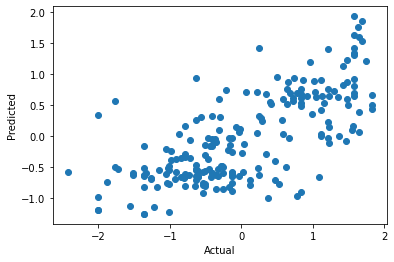

In [159]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Model 2: RANDOM FOREST REGRESSOR:

In [160]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)
scr_rfr = cross_val_score(rfr,x_sc,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_rfr.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", rfr.score(x_train,y_train))
print("Test Score", rfr.score(x_test,y_test))

r2_Score 0.7323928058490228
CV Score 0.7513776148604518
MSE 0.26854523668178054
RMSE 0.5182135049202988
Train Score 0.9684338112959704
Test Score 0.7323928058490228


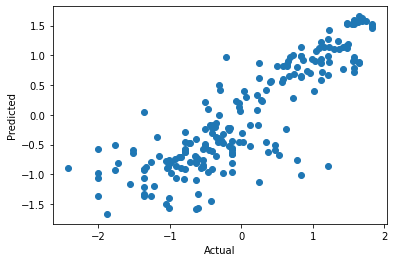

In [161]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Model 3: DECISION TREE REGRESSOR:

In [162]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred = dtr.predict(x_test)
scr_dtr = cross_val_score(dtr,x_sc,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_dtr.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", dtr.score(x_train,y_train))
print("Test Score", dtr.score(x_test,y_test))

r2_Score 0.5789203765447204
CV Score 0.5517235667167609
MSE 0.42255563233803334
RMSE 0.6500427926975526
Train Score 1.0
Test Score 0.5789203765447204


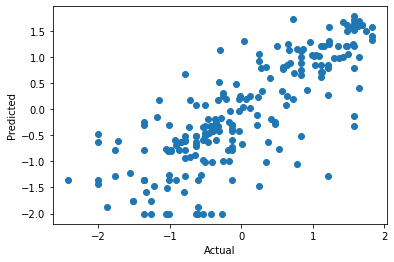

In [163]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Model 4: ADA BOOST REGRESSOR:

In [164]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor()
abr.fit(x_train,y_train)
y_pred = abr.predict(x_test)
scr_abr = cross_val_score(abr,x_sc,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_abr.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", abr.score(x_train,y_train))
print("Test Score", abr.score(x_test,y_test))

r2_Score 0.6644196832718494
CV Score 0.711821138045765
MSE 0.3367566251999393
RMSE 0.5803073540805246
Train Score 0.7598533689552712
Test Score 0.6644196832718494


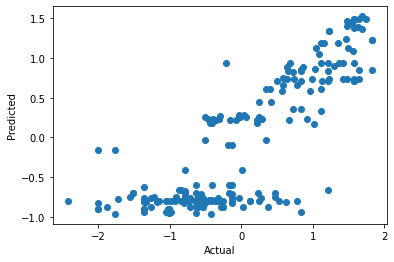

In [165]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Model 5: GRADIENT BOOST REGRESSOR:

In [166]:
from sklearn.ensemble import GradientBoostingRegressor 
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test)
scr_gbr = cross_val_score(gbr,x_sc,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_gbr.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", gbr.score(x_train,y_train))
print("Test Score", gbr.score(x_test,y_test))

r2_Score 0.7445353110592148
CV Score 0.7399698361789344
MSE 0.2563601683919456
RMSE 0.5063202231710142
Train Score 0.8675108303791674
Test Score 0.7445353110592148


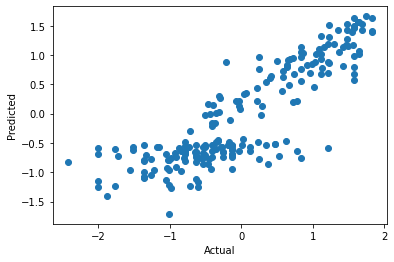

In [167]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Comparing the CV Score and r2 score to find out which is having less difference and the model which is having less difference is considered as best model.

As per this, SUPPORT VECTOR REGRESSOR model is considered as best model.

After that,tuning the hyper parameter to check the model accuracy further.

Applying hyper parameter tuning

In [168]:
param = {'learning_rate':[0.1], 'n_estimators':[100], 'criterion':['mse','mae'],
         'min_samples_split':[6,8,10,12,14,16],'min_samples_leaf':[10,12,14,16]
    
}

In [169]:
gs = GridSearchCV(gbr, param_grid = param, cv = 5)

In [170]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'learning_rate': [0.1],
                         'min_samples_leaf': [10, 12, 14, 16],
                         'min_samples_split': [6, 8, 10, 12, 14, 16],
                         'n_estimators': [100]})

In [171]:
gs.best_params_

{'criterion': 'mse',
 'learning_rate': 0.1,
 'min_samples_leaf': 10,
 'min_samples_split': 16,
 'n_estimators': 100}

In [181]:
final = GradientBoostingRegressor(learning_rate = 0.4,n_estimators = 100,criterion= 'mse',min_samples_split =20 ,
                                  min_samples_leaf = 18)
final.fit(x_train,y_train)
y_pred = final.predict(x_test)


print("r2_Score", r2_score(y_test,y_pred))
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", final.score(x_train,y_train))
print("Test Score", final.score(x_test,y_test))

r2_Score 0.7293660878678069
MSE 0.27158256420660054
RMSE 0.5211358404548669
Train Score 0.9198478981847078
Test Score 0.7293660878678069


After tried with different parameter,Model accuracy has been increased to 73%.

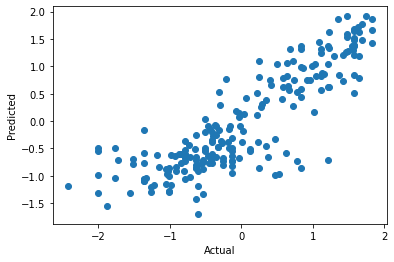

In [182]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [184]:
fin = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
fin

,Actual,Predicted
682,1.422152,1.206554
741,1.572400,1.200824
414,-0.633075,-1.421624
205,1.034239,1.036540
146,1.740779,1.909944
...,...,...
829,-0.011192,-0.087636
13,-0.722634,-1.028756
804,1.688313,1.765893
87,-0.412148,-0.203338


Saving the model

In [185]:
import joblib
joblib.dump(final,"powerplant_regression.pkl")

['powerplant_regression.pkl']

## Conclusion:
    * As per classification problem target variable "primary_fuel", model accuracy score is 80%
    * As per Regression problem target variable "capacity_mw", model accuracy score is 73 %.